**Test Environment Notebook**
------

In [1]:
### Tool imports
import joblib as jbl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### sklearn imports
from sklearn.cluster import KMeans, MiniBatchKMeans

### Local imports
import utils.data_handling_lib as dhl
import utils.graphics_lib as gl

from utils.data_handling_lib import RANDOM_STATE

Create raw test dataset

In [2]:
dataset_file_path = "datasets/winequality-combined.csv"
test_raw_data = dhl.load_data(dataset_file_path)

Reduced features test

In [3]:
test_reduced_raw_data = test_raw_data.copy()

test_reduced_raw_data.drop(["free sulfur dioxide", "total sulfur dioxide", "pH", "residual sugar", "sulphates"], axis=1, inplace=True)

Split dataset

In [4]:
train, train_labels, test, test_labels = dhl.strat_split_dataset(test_reduced_raw_data, "quality", 1)

In [5]:
print(train.head())

      fixed acidity  volatile acidity  citric acid  chlorides  density  \
3417            6.0              0.26         0.29      0.032   0.9896   
1904            7.3              0.41         0.24      0.057   0.9949   
3777            7.6              0.32         0.58      0.050   0.9999   
3337            7.5              0.15         0.38      0.054   0.9946   
70              7.7              0.63         0.08      0.076   0.9967   

      alcohol  color  
3417     12.3      0  
1904      9.9      0  
3777      9.2      0  
3337     10.0      0  
70        9.5      1  


**Random Forest w/ KMeans Clustering Test**

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
import utils.clustering_tools_lib as ctl

In [8]:

def fit_test_pipeline_1(data, labels):
    rfkc_test_pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=5, random_state=RANDOM_STATE)),
        ("rf_reg", RandomForestRegressor(n_estimators=100, max_features=4))
    ])
    
    rfkc_test_pipeline.fit(data, labels)
    
    return rfkc_test_pipeline

In [9]:
param_grid = dict(kmeans__n_clusters=[10, 100, 1000])
test_1 = fit_test_pipeline_1(train, train_labels)
#grid_search = GridSearchCV(test_1, param_grid=param_grid)

#grid_search.fit(train, train_labels)
#dhl.save_model(grid_search, "GridSearchRFRegTest1")

In [10]:
grid_search = dhl.load_object("models", "GridSearchRFRegTest1")

In [11]:
print(f"\n{grid_search.best_score_}\n{grid_search.best_params_}\n{grid_search.best_estimator_}")


0.1658962773804495
{'kmeans__n_clusters': 1000}
Pipeline(steps=[('kmeans', KMeans(n_clusters=1000, random_state=19)),
                ('rf_reg', RandomForestRegressor(max_features=4))])


In [12]:
#dhl.save_model(grid_search,filename="GridSearchRFRegTest1")

In [13]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(train)

KMeans(n_clusters=100)

In [14]:
train.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,alcohol,color
3417,6.0,0.26,0.29,0.032,0.9896,12.3,0
1904,7.3,0.41,0.24,0.057,0.9949,9.9,0
3777,7.6,0.32,0.58,0.050,0.9999,9.2,0
3337,7.5,0.15,0.38,0.054,0.9946,10.0,0
70,7.7,0.63,0.08,0.076,0.9967,9.5,1


In [15]:
#sil_scores_100 = ctl.give_silhouette_scores(train, range_upper=100)
#jbl.dump(sil_scores_100, "exports/misc/sil_scores_100.txt")

sil_scores_100 = jbl.load("exports/misc/sil_scores_100.txt")

Saving figure 0_silhouette_scores


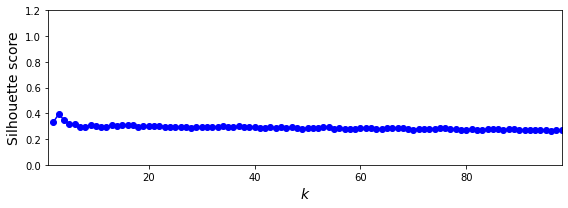

In [16]:
gl.plot_silhouette_scores(sil_scores_100)

In [17]:
sil_scores_15 = ctl.give_silhouette_scores(train, range_upper=15)
#jbl.dump(sil_scores_15, "exports/misc/sil_scores_15.txt")

Saving figure 1_silhouette_scores


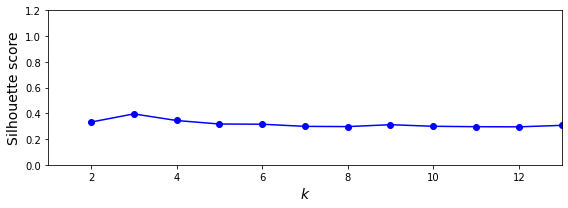

In [18]:
gl.plot_silhouette_scores(sil_scores_15)